In [8]:
!pip install seaborn
!pip install scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
    --------------------------------------- 1.0/44.5 MB 7.1 MB/s eta 0:00:07
   --- ------------------------------------ 4.2/44.5 MB 12.0 MB/s eta 0:00:04
   ------ --------------------------------- 6.8/44.5 MB 13.5 MB/s eta 0:00:03
   -------- ------------------------------- 10.0/44.5 MB 12.7 MB/s eta 0:00:03
   ---------- ----------------------------- 12.1/44.5 MB 13.0 MB/s eta 0:00:03
   --------------- ------------------------ 17.0/44.5 MB 14.1 MB/s eta 0:00:02
   ----------------- ---------------------- 19.4/44.5 MB 13.9 MB/s eta 0:00:02
   ------------------- -------------------- 21.8/44.5 MB 13.4 MB/s eta 0:00:02
   ---------------------- ----------------- 24.9/44.5 MB 13.6 MB/s eta 0:00:02
   ------------------------ --------------- 27.5/44.5 MB 13.4 MB/s eta 0:00:02
   --------------------------- ------------ 30.9/44.5 MB 13.6 MB/s eta 0:00:01
   ------------------------------ --------- 33.6/44.5 MB 13.6 MB/


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Missing values in 'species': 0
Skewness and Kurtosis Analysis:
     species  bill_length_skew  bill_length_kurtosis  bill_depth_skew  \
0     Adelie          0.162533             -0.228104         0.329209   
1     Gentoo          0.712323              1.147647         0.334623   
2  Chinstrap         -0.095936             -0.124011         0.006726   

   bill_depth_kurtosis  
0            -0.101072  
1            -0.611126  
2            -0.898740  


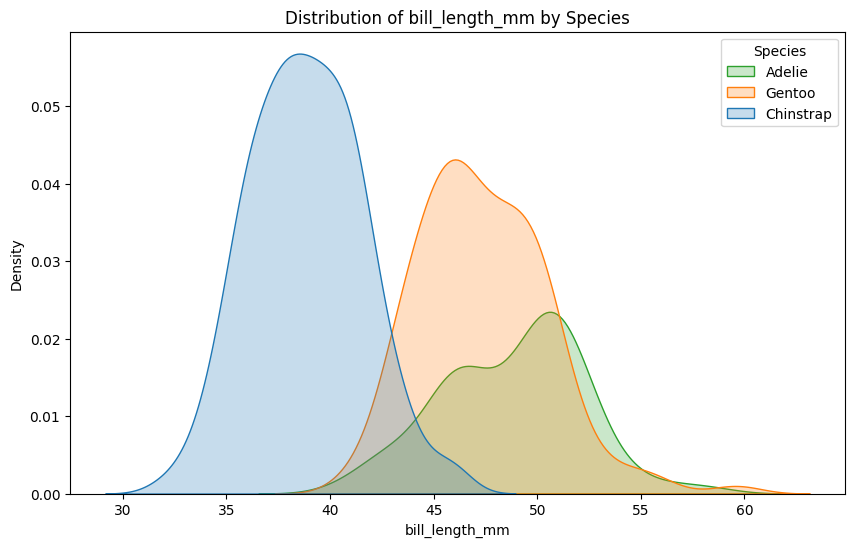

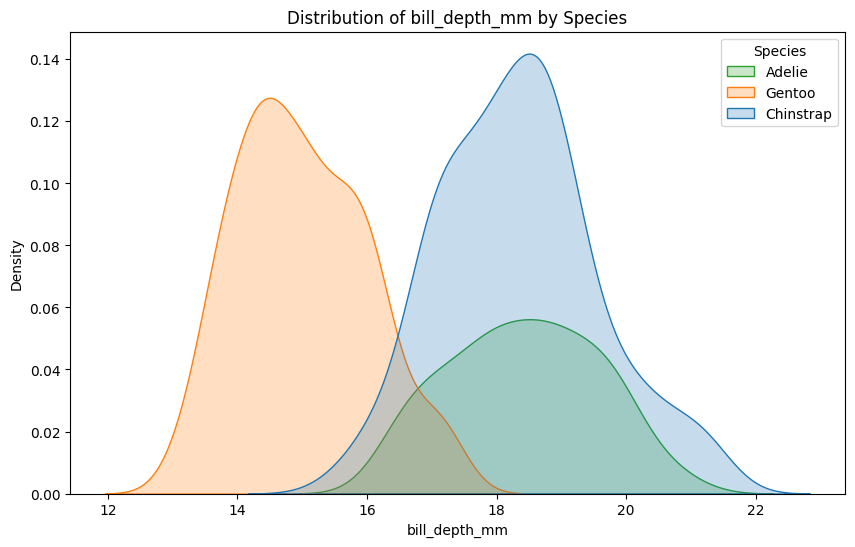

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

file_path = 'cleaned_dataset.csv' 
data = pd.read_csv(file_path)

print("Missing values in 'species':", data['species'].isnull().sum())

species_list = data['species'].unique()

analysis = []
for species in species_list:
    subset = data[data['species'] == species]
    bill_length_skew = skew(subset['bill_length_mm'])
    bill_length_kurt = kurtosis(subset['bill_length_mm'])
    bill_depth_skew = skew(subset['bill_depth_mm'])
    bill_depth_kurt = kurtosis(subset['bill_depth_mm'])
    
    analysis.append({
        'species': species,
        'bill_length_skew': bill_length_skew,
        'bill_length_kurtosis': bill_length_kurt,
        'bill_depth_skew': bill_depth_skew,
        'bill_depth_kurtosis': bill_depth_kurt,
    })

analysis_df = pd.DataFrame(analysis)

print("Skewness and Kurtosis Analysis:")
print(analysis_df)

for feature in ['bill_length_mm', 'bill_depth_mm']:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data, x=feature, hue='species', fill=True)
    plt.title(f"Distribution of {feature} by Species")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend(title='Species', labels=species_list) 
    plt.show()